In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#load the data
corp_cards = pd.read_pickle('./data/corp_cards_processed.pkl')
runner_cards = pd.read_pickle('./data/runner_cards_processed.pkl')
corp_decks = pd.read_pickle('./data/corp_decks_processed.pkl')
runner_decks = pd.read_pickle('./data/runner_decks_processed.pkl')

In [2]:
#utility function to view a deck in a human readable way
def display_deck(deck):
    display = [cards[cards['code'] == deck['identity_card']]['title'].iloc[0]]
    deck = deck[0:-5][deck[0:-5] != 0]
    display = display+[str(x[1])+'x '+cards[cards['code'] == x[0]]['title'].iloc[0] for x in list(deck.items())]
    return display

In [9]:
#the training data is the list of cards in each deck and we want to predict the faction
corp_X = corp_decks.iloc[:,:-4]
corp_y = corp_decks['faction']

runner_X = runner_decks.iloc[:,:-4]
runner_y = runner_decks['faction']

0.9973541791942273


/home/lucas/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=<StringArray>
['weyland-consortium', 'nbn', 'jinteki', 'haas-bioroid']
Length: 4, dtype: string as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


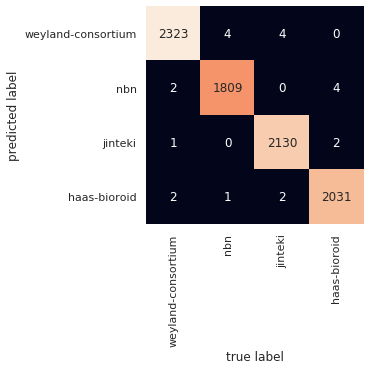

In [10]:
#First we try a naive_bayes model on both datasets to get a baseline
X = corp_X
y = corp_y

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5,test_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
print(accuracy_score(y2, y2_model))

#Let's order the factions so we can label the predictions
faction_list = y.unique()

from sklearn.metrics import confusion_matrix
#make a confusion matrix to see mislabelings
mat = confusion_matrix(y2, y2_model,faction_list)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=faction_list, yticklabels=faction_list)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [12]:
#now lets see if we can get a visulazition by reducing the data to 2 dimensions with a pca
X = corp_X
y = corp_y

from sklearn.decomposition import PCA
pca = PCA(2)
projected = pca.fit_transform(X)

In [17]:
faction_list = y.unique()

In [14]:
colors =[]
for ident in y:
    if ident == 'weyland-consortium':
        color = 'darkgreen'
        
    if ident == 'nbn':
        color = 'yellow'
        
    if ident == 'jinteki':
        color = 'red'
        
    if ident == 'haas-bioroid':
        color = 'purple'
        
    if ident == 'shaper':
        color = 'lightgreen'
        
    if ident == 'criminal':
        color = 'blue'
        
    if ident == 'anarch':
        color = 'orange'
        
    if ident == 'apex':
        color = 'black'
        
    if ident == 'sunny-lebeau':
        color = 'magenta'
        
    if ident == 'adam':
        color = 'gold'
    colors.append(color)

Text(0, 0.5, 'component 2')

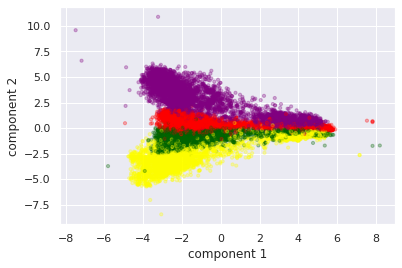

In [15]:
plt.scatter(projected[:, 0], projected[:, 1],s=10,c=colors,alpha=0.3)
plt.xlabel('component 1')
plt.ylabel('component 2')

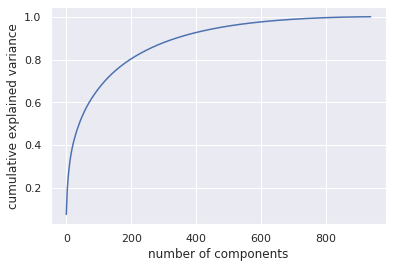

In [16]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
#probably everything broken after this.....

#guassian mixture model

#first reduce dimension
from sklearn.decomposition import PCA
pca = PCA(0.9, whiten=True)
data = pca.fit_transform(X)
data.shape

(35265, 585)

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10).fit(data)

KeyboardInterrupt: 

In [30]:
gmm.bic(data)

-81798004.9566128

In [26]:
deck_new[0]

array([ 0.00025291,  0.00369065,  0.00095326, ..., -0.04864278,
        0.03338733,  0.0092956 ])

In [11]:
gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)